<a href="https://colab.research.google.com/github/matthias-k/computational_physics_2024/blob/master/02_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron, MNIST
---
This notebook is adapted from an [introductory course of Udacity](https://github.com/udacity/deep-learning-v2-pytorch).

In this notebook, we will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.

The process will be broken down into the following steps:
>1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset!

Before we begin, we have to import the necessary libraries for working with data and PyTorch.

In [1]:
# import libraries
import torch
import numpy as np


---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a few moments, and you should see your progress as the data is loading. You may also choose to change the `batch_size` if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

### Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

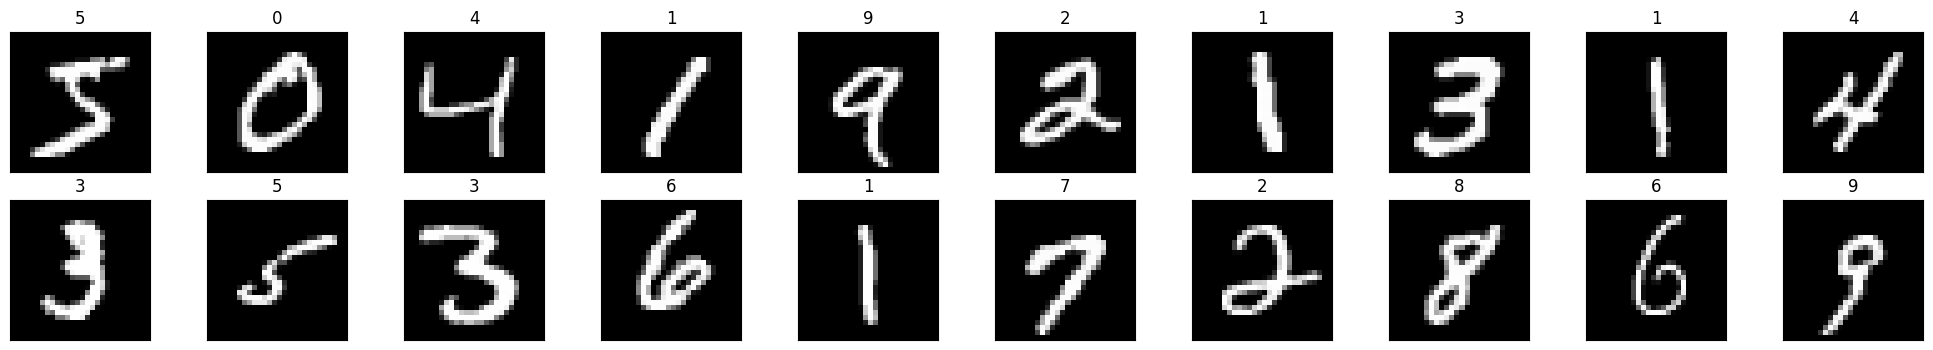

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20 // 2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

### View an Image in More Detail

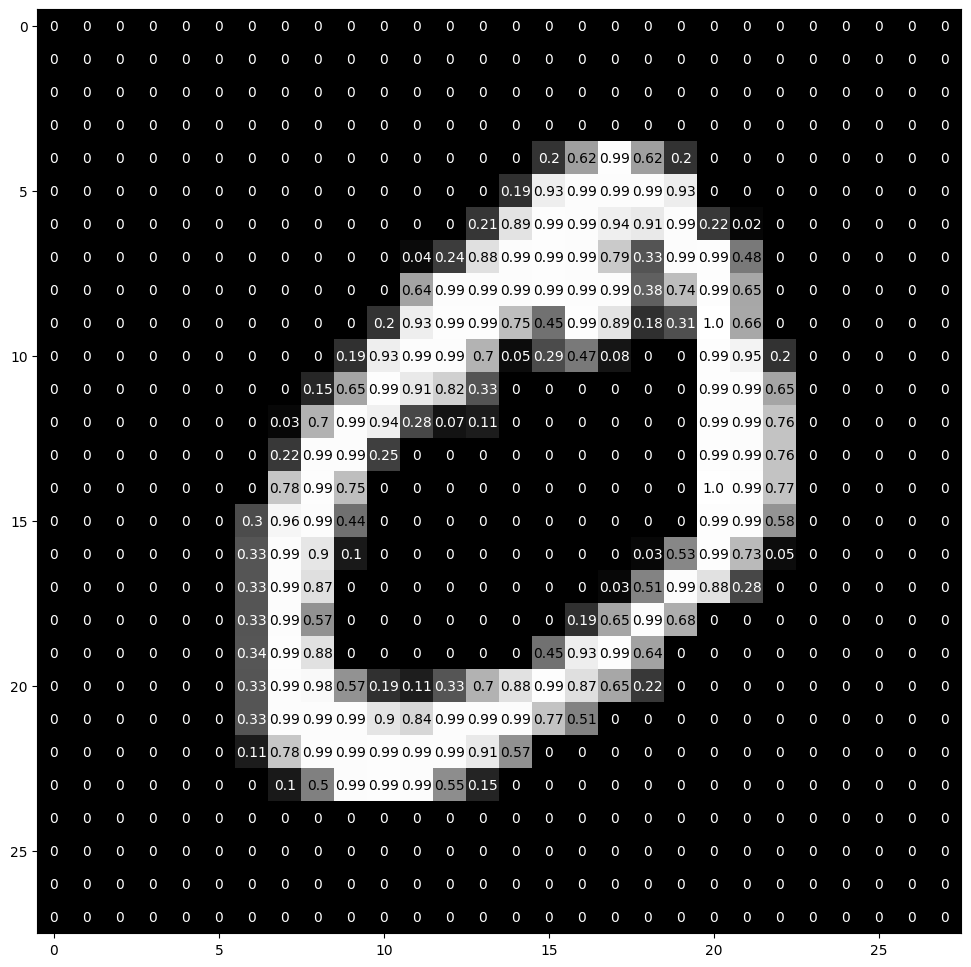

In [4]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [5]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 10 hidden nodes)
        self.fc1 = nn.Linear(28 * 28, 10)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [87]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [14]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.355694
Epoch: 2 	Training Loss: 0.295486
Epoch: 3 	Training Loss: 0.282423
Epoch: 4 	Training Loss: 0.274311
Epoch: 5 	Training Loss: 0.268415
Epoch: 6 	Training Loss: 0.263880
Epoch: 7 	Training Loss: 0.260267
Epoch: 8 	Training Loss: 0.257231
Epoch: 9 	Training Loss: 0.254661
Epoch: 10 	Training Loss: 0.252470
Epoch: 11 	Training Loss: 0.250579
Epoch: 12 	Training Loss: 0.248925
Epoch: 13 	Training Loss: 0.247412
Epoch: 14 	Training Loss: 0.246033
Epoch: 15 	Training Loss: 0.244763
Epoch: 16 	Training Loss: 0.243560
Epoch: 17 	Training Loss: 0.242410
Epoch: 18 	Training Loss: 0.241358
Epoch: 19 	Training Loss: 0.240373
Epoch: 20 	Training Loss: 0.239414
Epoch: 21 	Training Loss: 0.238556
Epoch: 22 	Training Loss: 0.237735
Epoch: 23 	Training Loss: 0.236936
Epoch: 24 	Training Loss: 0.236201
Epoch: 25 	Training Loss: 0.235513
Epoch: 26 	Training Loss: 0.234840
Epoch: 27 	Training Loss: 0.234207
Epoch: 28 	Training Loss: 0.233594
Epoch: 29 	Training Loss: 0.2

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [15]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.269273

Test Accuracy of     0: 97% (960/980)
Test Accuracy of     1: 98% (1113/1135)
Test Accuracy of     2: 85% (886/1032)
Test Accuracy of     3: 91% (924/1010)
Test Accuracy of     4: 91% (896/982)
Test Accuracy of     5: 89% (801/892)
Test Accuracy of     6: 94% (907/958)
Test Accuracy of     7: 90% (928/1028)
Test Accuracy of     8: 87% (854/974)
Test Accuracy of     9: 93% (941/1009)

Test Accuracy (Overall): 92% (9210/10000)




```
# This is formatted as code
```

### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

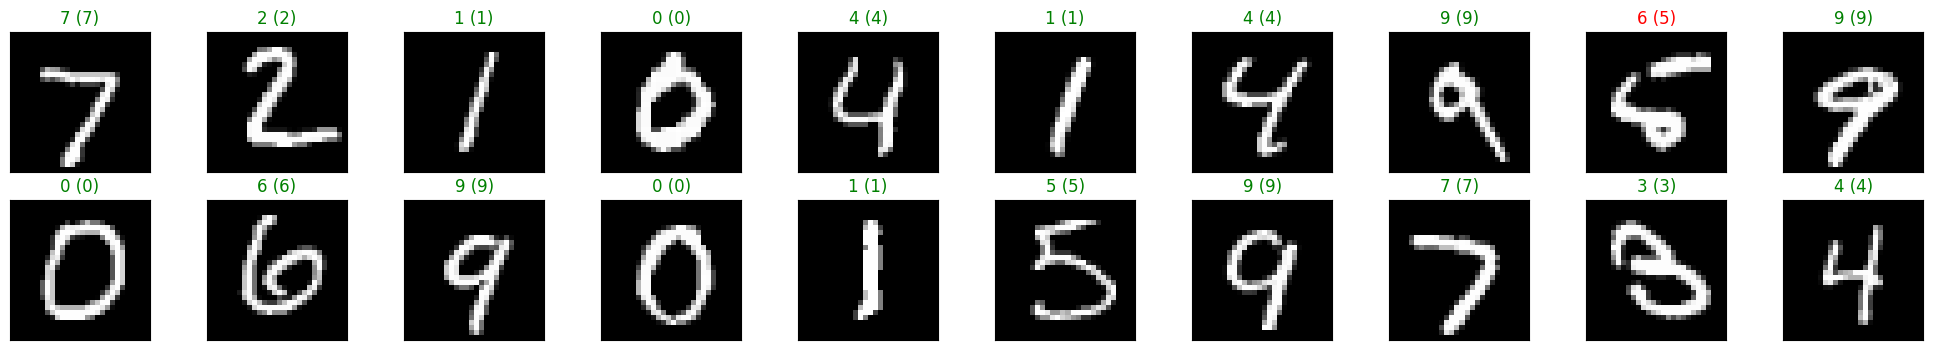

In [17]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

### Excercises

#### Excercise 2.1
Fill in all the blank spots to train a basic MLP on handwritten digit recognition. What result can you achieve?

Ergebnis:

Mithilfe des Optimierers SGD und mit der learning rate 0.1 wurde ein Training Loss von 0.232466 erzielt. Die Test Accuracy liegt bei 92%. Im Folgenden ist der entsprechende Code.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 10)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [ ]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [ ]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.355694
Epoch: 2 	Training Loss: 0.295486
Epoch: 3 	Training Loss: 0.282423
Epoch: 4 	Training Loss: 0.274311
Epoch: 5 	Training Loss: 0.268415
Epoch: 6 	Training Loss: 0.263880
Epoch: 7 	Training Loss: 0.260267
Epoch: 8 	Training Loss: 0.257231
Epoch: 9 	Training Loss: 0.254661
Epoch: 10 	Training Loss: 0.252470
Epoch: 11 	Training Loss: 0.250579
Epoch: 12 	Training Loss: 0.248925
Epoch: 13 	Training Loss: 0.247412
Epoch: 14 	Training Loss: 0.246033
Epoch: 15 	Training Loss: 0.244763
Epoch: 16 	Training Loss: 0.243560
Epoch: 17 	Training Loss: 0.242410
Epoch: 18 	Training Loss: 0.241358
Epoch: 19 	Training Loss: 0.240373
Epoch: 20 	Training Loss: 0.239414
Epoch: 21 	Training Loss: 0.238556
Epoch: 22 	Training Loss: 0.237735
Epoch: 23 	Training Loss: 0.236936
Epoch: 24 	Training Loss: 0.236201
Epoch: 25 	Training Loss: 0.235513
Epoch: 26 	Training Loss: 0.234840
Epoch: 27 	Training Loss: 0.234207
Epoch: 28 	Training Loss: 0.233594
Epoch: 29 	Training Loss: 0.2

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.269273

Test Accuracy of     0: 97% (960/980)
Test Accuracy of     1: 98% (1113/1135)
Test Accuracy of     2: 85% (886/1032)
Test Accuracy of     3: 91% (924/1010)
Test Accuracy of     4: 91% (896/982)
Test Accuracy of     5: 89% (801/892)
Test Accuracy of     6: 94% (907/958)
Test Accuracy of     7: 90% (928/1028)
Test Accuracy of     8: 87% (854/974)
Test Accuracy of     9: 93% (941/1009)

Test Accuracy (Overall): 92% (9210/10000)




```
# This is formatted as code
```

### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

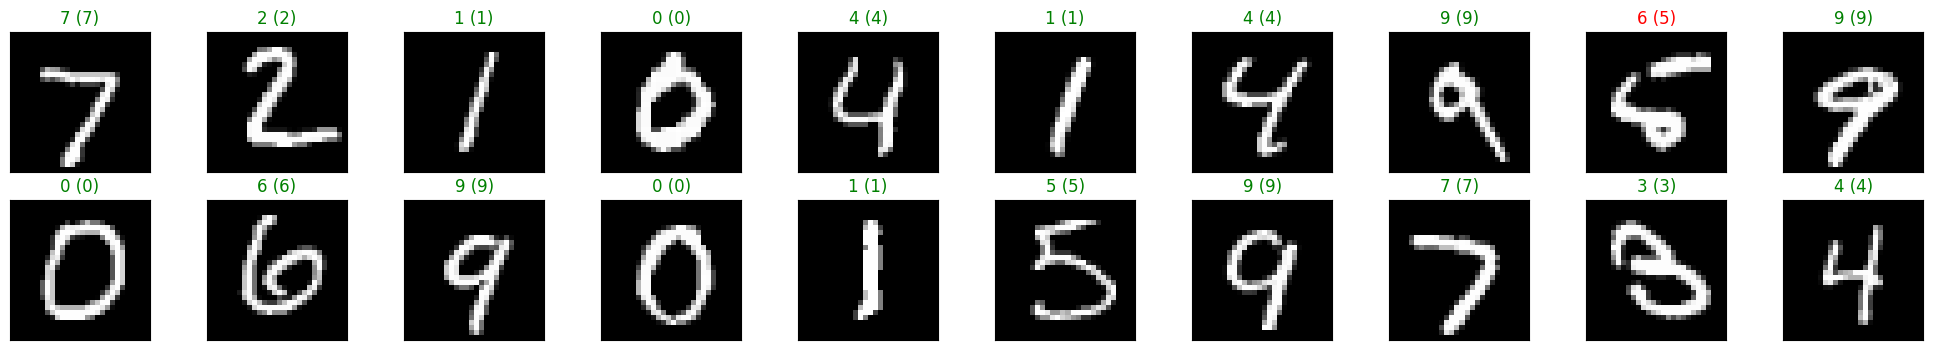

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))



#### Excercise 2.2
Adapt the network architecture, batch size and optimiser to increase accuracy. What is the best result you can achieve? Why do you think your changes improved the performance? What did you try what didnt work?

Ergebnis:

Mit einem weiteren linear layer, das von 10 auf 10 hidden nodes abbildet, wurden folgende Werte erreicht:  
Training Loss: 0.187318  
Test Accuracy (Overall): 93% (9345/10000)

Ein weiterer Versuch bestand darin, ein weiteres linear layer hinzuzufügen. Dabei wurde Folgendes geändert: Das erste layer bildet von 28 * 28 auf 128 ab, das Zweite von 128 auf 10 und das Dritte von 10 auf 10. Foglende Werte wurden damit erreicht:  
Training Loss: 0.468575  
Test Accuracy (Overall): 77% (7796/10000)

Da dieser Versuch so schlecht lief, wurde in einem dritten Versuch das erste layer wieder auf 10 abgebildet und die zwei weiteren layer beide von 10 auf 10. Die Werte waren damit:  
Training Loss: 0.183175  
Test Accuracy (Overall): 92% (9244/10000)  
Hierbei wurde dr Training Loss von Epoche 29 gewhählt, da der von Epoche 30 höher war. Daran kann man erkennen, dass die learning rate für diesen Bereich zu hoch war, und man um das Minimum "herum gesprungen" ist.

Es scheint als würden immer weitere linear layer keinen maßgebenden Vorteil mehr bringen, da der erste Versuch bzgl. des Trainig Loss bereits fast genauso gut war als der des dritten Versuchs. Bei der Test Accuracy war der erste Versuch insgesamt sogar am Besten.

In [37]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 10 hidden nodes)
        self.fc1 = nn.Linear(28 * 28, 10)
        # new linear layer
        self.fc2 = nn.Linear(10, 10)
        # new linear layer
        self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [38]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [39]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.702465
Epoch: 2 	Training Loss: 0.514468
Epoch: 3 	Training Loss: 0.478281
Epoch: 4 	Training Loss: 0.296683
Epoch: 5 	Training Loss: 0.241742
Epoch: 6 	Training Loss: 0.231733
Epoch: 7 	Training Loss: 0.225884
Epoch: 8 	Training Loss: 0.219453
Epoch: 9 	Training Loss: 0.214195
Epoch: 10 	Training Loss: 0.210265
Epoch: 11 	Training Loss: 0.208367
Epoch: 12 	Training Loss: 0.205704
Epoch: 13 	Training Loss: 0.204201
Epoch: 14 	Training Loss: 0.200907
Epoch: 15 	Training Loss: 0.200401
Epoch: 16 	Training Loss: 0.199400
Epoch: 17 	Training Loss: 0.197547
Epoch: 18 	Training Loss: 0.194858
Epoch: 19 	Training Loss: 0.194413
Epoch: 20 	Training Loss: 0.193381
Epoch: 21 	Training Loss: 0.191370
Epoch: 22 	Training Loss: 0.189985
Epoch: 23 	Training Loss: 0.188684
Epoch: 24 	Training Loss: 0.188435
Epoch: 25 	Training Loss: 0.186080
Epoch: 26 	Training Loss: 0.186773
Epoch: 27 	Training Loss: 0.185471
Epoch: 28 	Training Loss: 0.185656
Epoch: 29 	Training Loss: 0.1

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [42]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.293656

Test Accuracy of     0: 95% (938/980)
Test Accuracy of     1: 97% (1109/1135)
Test Accuracy of     2: 84% (876/1032)
Test Accuracy of     3: 93% (940/1010)
Test Accuracy of     4: 95% (938/982)
Test Accuracy of     5: 88% (792/892)
Test Accuracy of     6: 93% (899/958)
Test Accuracy of     7: 93% (960/1028)
Test Accuracy of     8: 90% (885/974)
Test Accuracy of     9: 89% (907/1009)

Test Accuracy (Overall): 92% (9244/10000)




```
# This is formatted as code
```

### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

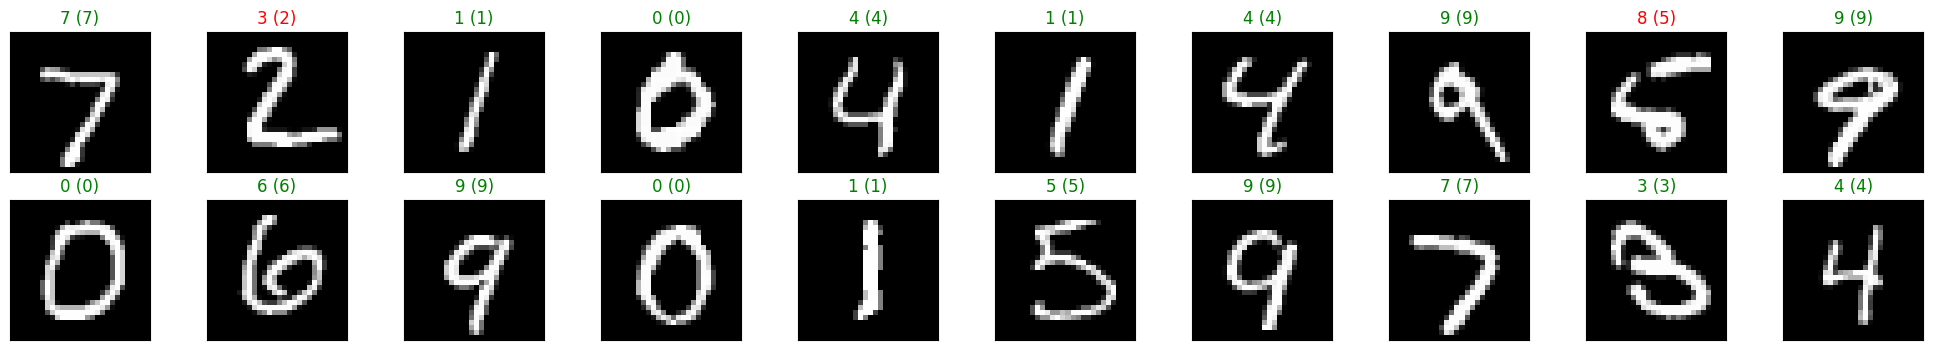

In [44]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))



#### Excercise 2.3
Replace the fully connected layer with convolutional layers. How does the number of parameters change? Why do convolutional layers make sense for image data? Can you further increase model performance on handwritten digit recognition? Discuss again what you tried, what worked and what didn't work.



Ergebnis:

Versuch 1:  
Zunächst wird nur ein convolutional layer hinzugefügt mit 16 out_channels. Das pool layer reduziert die Bildgröße auf die Hälfte. Am Ende kommt wieder ein fully connected layer, das (16 * 14 * 14) auf die 10 Bilder abbildet. Man erhielt die Werte:  
Training Loss:  1.596663  
Test Accuracy:  31% (3119/10000)  
Offensichtlicherweise ist dieses Modell ziemlich schlecht.

Versuch 2:  
Es wurde ein weiteres convolutional layer hinzugefügt, das die 16 channels auf 32 erweitert. Das pool layer und das fully connected layer bleiben gleich, bis auf das Arguments bei der "Linear"-Funktion, das nun von (32 * 7 * 7) auf 10 abbildet. Die Werte waren dann:  
Training Loss:  0.003494  
Test Accuracy:  98% (9864/10000)  
Für den Training Loss wurde hier der, der Epoche 29 angegeben, da dieser der niedrigste ist. Seit Epoche 20, das einen Training Loss von 0.005871 hatte, "sprang" der Trainig Loss zwischen diesem Wert und dem Minimum. Daran erkennt man wie zuvor, dass in diesem Bereich die learning rate zu hoch ist.  
Besonders auffällig waren außerdem Epoche 1 und 2. Der Training Loss von Epoche 1 war 1.180758 und der von Epche 2 war 0.083414. Nach einem schlechten Beginn hat sich das Modell sofort extrem verbessert. Ein zweites convolutional layer hat somit schon zu enormen Verbesserungen geführt, was allgemein auch durch die hohe Test Accuracy zu erkennen ist.

Versuch 3:  
Hier wurde nur die learning rate von 0.1 auf 0.01 verringert. Die Ergebnisse waren dann:  
Training Loss: 0.000332  
Test Accuracy:  99% (9908/10000)  
Man sieht, dass das Modell durch diese kleine Änderung nochmal bemerkbar verbessert werden konnte.

Im Folgenden werden die Fragen bearbeitet:

How does the number of parameters change?  
Für die Berechnung der Parameter des fully connected layers wurde von zwei linearen Layern ausgegangen, da das Modell hinreichend gut war. Dies entspricht dem ersten Versuch für Aufgabe 2.2.  Das erste layer hat 28 * 28 * 10 + 10 = 7 850 Parameter. Das zweite hat 10 * 10 + 10 = 110 Parameter, womit man insgesamt auf 7 960 Parameter kommt.  
Für die Berechnung der Parameter mit den convolutional layern wird vom letzten Modell, also Versuch 3, ausgegangen. Für das erste convolutional layer erhält man [3 * 3 (für die Kernelgröße) * 1 (für den in_channel) + 1 (für ein Bias pro Filter)] * 16 (für den out_channel) = 160 Parameter. Für das zweite layer erhält man entsprechen (3*3 * 16 + 1) * 32 = 4 640 Parameter. Insgesamt hat man somit 4 800 Parameter.  
Das sind einiges weniger Parameter und man erlangt zugleich ein deutlich besseres Modell.

Why do convolutional layers make sense for image data?  
Durch die convolutional layer gibt es nicht von jedem Pixel zu jedem Neuron eine Verbindung. Das steigert zum einen die Effizienz und macht zum anderen bei Bildern Sinn, da verschiedene Objekte in Bildern nicht mit anderen zusammenhängen müssen. Bei dem verwendeten Datenset ist es zum Beispiel irrelavant Kenntnis von den schwarzen Pixeln am Rand zu haben. Dies führt zu einem weiteren Vorteil, nämlich der Translationsinvarianz. Bilder, Objekte oder Zahlen können unabhängig von ihrer Position erkannt werden. Ein weiterer wichtiger Vorteil ist die Reduzierung von Overfitting.

Can you further increase model performance on handwritten digit recognition?  
Durch weitere convolutional layer müsste sich das Modell weiter verbessern. Damit steigt jedoch die Zahl der Parameter und die Effizienz sinkt. Je nach Komplexität der Aufgabe, muss dies gegeneinander abgewägt werden.  
Außerdem könnte ein zweites linear layer eingebaut werden. Damit erhält man die Möglichkeit die 32 * 7 * 7 = 1 568 Eingänge zunächst auf beispielsweise 128 zu reduzieren und in einem zweiten Schritt erst auf 10, sodass weniger Informationen verloren gehen.  
Letzteres wird in einem weiteren Versuch getestet.

Versuch 4:
Man hat die gleichen 2 convolutional layer. Das pool layer bleibt gleich. Es wird nun ein zweites linear layer hinzugefügt. Das erste layer bildet dann auf 128 ab und erst das zweite reduziert dann auf 10. Man erhielt:  
Training Loss: 0.003684  
Test Accuracy : 98% (9877/10000)   
Das ist etwas schlechter als Versuch 3. Somit hat das das zweite lineare layer keinen maßgebenden Vorteil mehr gebracht. 


In [11]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class NewNet(nn.Module):
    def __init__(self):
        super(NewNet, self).__init__()
        # first convolutional layer (1 -> 16)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        # second concolutional layer (16 -> 32)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        # pool layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # fully connected layer
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # 32, da 32 channels und 7*7, da die Bildgröße zweimal halbiert wird
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten image input
        x = x.view(-1, 32 * 7 * 7)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

# initialize the NN
model = NewNet()
print(model)

NewNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [12]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [13]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 1.266086
Epoch: 2 	Training Loss: 0.287857
Epoch: 3 	Training Loss: 0.107611
Epoch: 4 	Training Loss: 0.078714
Epoch: 5 	Training Loss: 0.064071
Epoch: 6 	Training Loss: 0.054318
Epoch: 7 	Training Loss: 0.046978
Epoch: 8 	Training Loss: 0.041464
Epoch: 9 	Training Loss: 0.036843
Epoch: 10 	Training Loss: 0.032849
Epoch: 11 	Training Loss: 0.029538
Epoch: 12 	Training Loss: 0.026582
Epoch: 13 	Training Loss: 0.023937
Epoch: 14 	Training Loss: 0.021544
Epoch: 15 	Training Loss: 0.019214
Epoch: 16 	Training Loss: 0.017380
Epoch: 17 	Training Loss: 0.015533
Epoch: 18 	Training Loss: 0.013946
Epoch: 19 	Training Loss: 0.012471
Epoch: 20 	Training Loss: 0.011123
Epoch: 21 	Training Loss: 0.009838
Epoch: 22 	Training Loss: 0.008815
Epoch: 23 	Training Loss: 0.007872
Epoch: 24 	Training Loss: 0.007050
Epoch: 25 	Training Loss: 0.006239
Epoch: 26 	Training Loss: 0.005622
Epoch: 27 	Training Loss: 0.005035
Epoch: 28 	Training Loss: 0.004557
Epoch: 29 	Training Loss: 0.0

In [14]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.044637

Test Accuracy of     0: 99% (976/980)
Test Accuracy of     1: 99% (1132/1135)
Test Accuracy of     2: 99% (1022/1032)
Test Accuracy of     3: 99% (1001/1010)
Test Accuracy of     4: 99% (975/982)
Test Accuracy of     5: 98% (882/892)
Test Accuracy of     6: 98% (944/958)
Test Accuracy of     7: 98% (1008/1028)
Test Accuracy of     8: 97% (953/974)
Test Accuracy of     9: 97% (984/1009)

Test Accuracy (Overall): 98% (9877/10000)




```
# This is formatted as code
```

### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

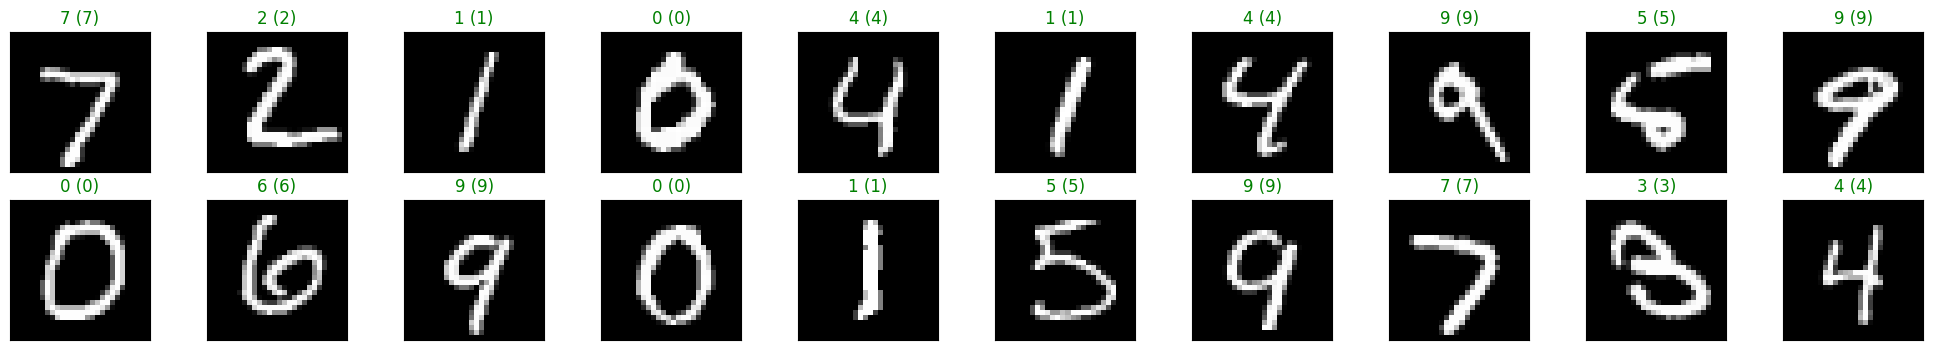

In [15]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# Using GPUs

if you have a GPU available, you can move your model to the cpu with `model = model.cuda()`. You'll also have to move data to the GPU before processing it, e.g. by running

```
data = data.cuda()
target = target.cuda()
```

for getting data back to the CPU (which you have to do before you can convert it to numpy), use `.cpu()`. In practive this offen looks like
```
loss = loss.detach().cpu().numpy()
```